In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### <span style='color:lightgreen;'>การปรับแต่งภาพแบบง่าย</span>

**<span style='color:lightgreen;'>การกลับภาพแนวนอนและแนวตั้ง</span>** การกลับภาพแนวนอนคือการสะท้อนภาพตามแกนตั้ง ส่วนการกลับภาพแนวตั้งคือการสะท้อนภาพตามแกนนอน
1. **<span style='color:lightgreen;'>สมการเชิงคณิตศาสตร์ของการกลับภาพแนวนอน:</span>** สมมติว่ามีภาพแทนด้วยเมทริกซ์ I โดย I(x, y) คือค่าพิกเซลที่ตำแหน่ง (x, y) ถ้า (x,y) เป็นตำแหน่งพิกเซล ตำแหน่งใหม่หลังกลับแนวนอนคือ (x, W−1−y)

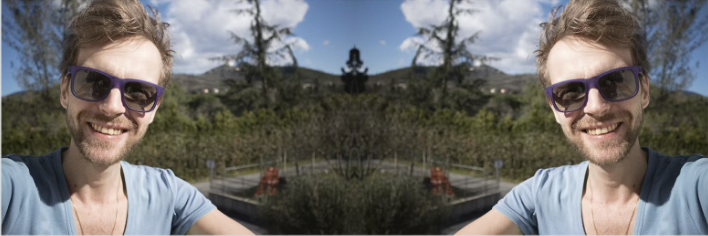

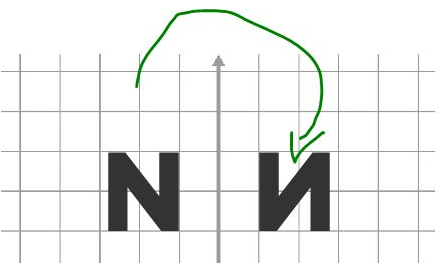

2. **<span style='color:lightgreen;'>สมการเชิงคณิตศาสตร์ของการกลับภาพแนวตั้ง:</span>** การกลับภาพแนวตั้งคือการสะท้อนภาพตามแกนนอน สมการคือ: ถ้า (x,y) เป็นตำแหน่งพิกเซล ตำแหน่งใหม่หลังกลับแนวตั้งคือ (H−1−x, y)

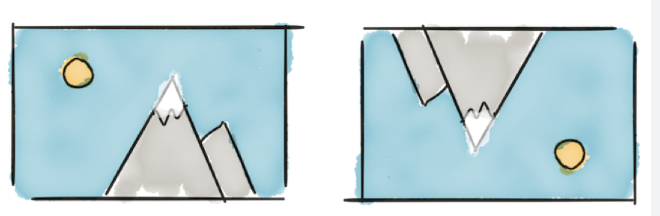

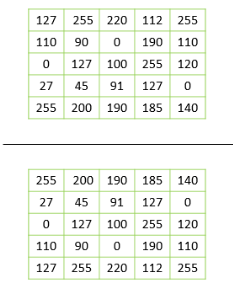

In [2]:
def ShowImage(img):
    plt.axis("off")
    plt.imshow(img)
    plt.show()

In [3]:

def flip_image(img, opt):
    r,c,n = img.shape
    out = np.zeros_like(img, dtype='uint8') 
    for i in range(r):
        for j in range(c):
            if opt == 0:
                #out[i,c-j-1] = img[i,j]
                out[i,j,:] = img[i,c-j-1,:]
            elif opt == 1:
                out[r-i-1,j,:] = img[i,j,:]
            elif opt == 2:
                out[r-i-1,c-j-1,:] = img[i,j,:]
            else:
                out[i,j,:] = img[i,j,:]
    return out.astype(np.uint8)


In [4]:
img = cv2.imread("./img/lena.png")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


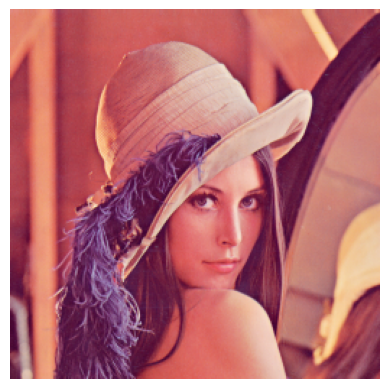

(256, 256, 3)


In [5]:
ShowImage(rgb)
print(rgb.shape)

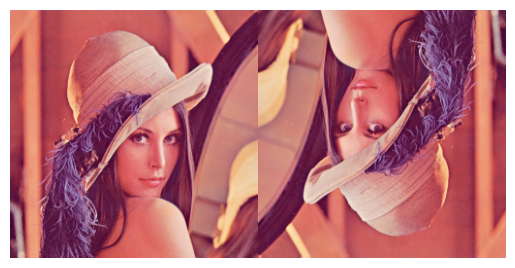

In [6]:
flip_img = flip_image(rgb, 2)
mul_img = cv2.hconcat([rgb, flip_img])
ShowImage(mul_img)

**<span style='color:lightgreen;'>ภาพทรานสโพส (Transposed Image)</span>** การทรานสโพสภาพคือการสลับแถวกับคอลัมน์ เหมือนการหมุนภาพ 90 องศาทวนเข็มนาฬิกา แล้วกลับภาพแนวนอน
1. **<span style='color:lightgreen;'>สมการเชิงคณิตศาสตร์ของการกลับตามแนวทแยง:</span>** ภาพทรานสโพสจะสลับแถวและคอลัมน์ ทำให้ภาพสะท้อนตามแนวทแยง สมการคือ: ถ้า (x,y) เป็นตำแหน่งพิกเซล ตำแหน่งใหม่หลังทรานสโพสคือ (y,x)

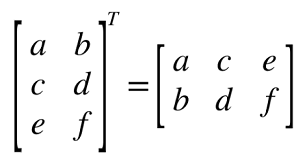


In [7]:
def Transpost_image(img):
    r, c, n = img.shape
    out = np.zeros((c, r, n), dtype='uint8') 
    
    for i in range(c):
        for j in range(r):
            out[i, j,:] = img[j,i,:]

    return out.astype(np.uint8)


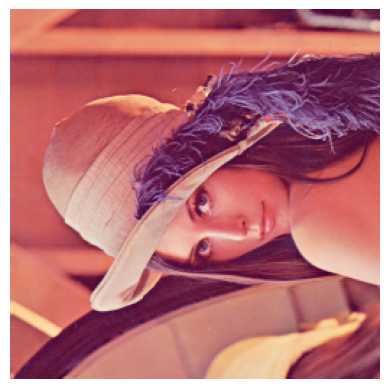

In [8]:
Timg = Transpost_image(rgb)
ShowImage(Timg)